# Final Project 

# 1. Introduction

|  |  |
| --- | --- |
| Name | Kenneth Chondro, Luvi Puspitasari, Arnaz Tejakusuma |
| Batch | FTDS-012 |
| Project Name | AutoRate |
| Project URL | http://auto-rate-comment.herokuapp.com |
| Dataset | Amazon Customer Review (https://www.kaggle.com/datasets/vivekprajapati2048/amazon-customer-reviews)|
| Objective | Membuat model untuk memprediksi user rating berdasarkan tone komentar customer |

# 2. Dataset Description

Dataset yang digunakan untuk project ini berjudul Amazon Customer Reviews. Dataset ini diperoleh dari Kaggle dan diposting oleh seseorang bernama Vivek Prajapati dengan link sebagai berikut: https://www.kaggle.com/datasets/vivekprajapati2048/amazon-customer-reviews


Sesuai dengan judulnya, dataset ini merupakan customer review daripada produk-produk yang dibeli dari platform Amazon. Dalam dataset ini juga terkandung berbagai informasi seperti Helpfulnessnumerator, Helpfulnessdenominator, dan Summary yang dapat digunakan sebagai fitur untuk memprediksi Score atau user rating yang diberikan oleh customer terhadap barang yang mereka beli dari platform Amazon.

Dalam project ini, user review masih dalam Bahasa Inggris, karena masih cukup sulit untuk menemukan dataset user review dalam Bahasa Indonesia dari marketplace lokal. Kedepannya project ini tentunya dapat dikembangkan untuk mengakomodasi marketplace lokal. Namun jika dataset yang digunakan dalam Bahasa Indonesia, maka harus ada beberapa perubahan yang dilakukan, salah satunya adalah menggunakan stop word remover Sastrawi.

# 3. Background

Perkembangan tekonologi yang semakin pesat telah membawa kita sampai pada era e-commerce. Pada era e-commerce ini, semakin banyak pedagang tradisional yang beralih ke perdagangan online dengan mendaftarkan toko mereka ke marketplace. Dengan semakin banyaknya penjual yang beralih ke perdagangan online, maka persaingan e-commerce tentunya semakin ketat. Untuk dapat survive menghadapi persaingan di era e-commerce, pemilik bisnis online harus membangun kredibilitas di mata konsumer.

Salah satu indikator dari binis online yang sukses membangun kredibilitas adalah user rating yang tinggi. Dengan memiliki user rating yang tinggi, dapat diartikan bahwa bisnis online tersebut telah berhasil memperoleh kepercayaan konsumer. Hal ini tentunya akan berdampak langsung dengan tingkat penjualan. Karena calon pembeli biasanya akan menjadikan user review sebagai bahan pertimbangan sebelum membeli sebuah barang atau produk. Toko-toko yang memiliki user review positif tentunya akan lebih mudah menarik perhatian calon pembeli.

Melihat hal ini, tidaklah heran bahwa di era e-commerce ini, user rating adalah hal yang sangat esensial. Sehingga pemberian rating yang kurang sesuai tentunya dapat memengaruhi kredibilitas sebuah toko online dihadapan konsumen dan akan berdampak langsung pada tingkat penjualan. Project ini bertujuan untuk menawarkan solusi untuk meminimalisir terjadinya kesalahan pemberian rating dengan cara membuat sebuah model yang dapat memprediksi rating marketplace berdasarkan komentar konsumen. Misalnya jika komentar dari konsumen bernada positif, maka akan muncul anjuran untuk memberi rating yang sesuai. Sehingga meminimalisir terjadinya pemberian rating yang tidak pas, baik yang terjadi secara sengaja atau tidak sengaja. 

# 4. Import Libraries

Dalam project ini, libraries utama yang digunakan adalah Pandas, Numpy, Matplotlib, Seaborn, Tensorflow, Scikit-Learn, dan Keras. Selain itu, untuk model improvement akan dilakukan dengan model simple-elmo.

In [ ]:
!pip install simple-elmo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Common Libraries
import os
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import pathlib
from tqdm import tqdm
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")
from google.colab import drive

# Preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Model
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM ,Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import GRU

# Split Dataset
from sklearn.model_selection import train_test_split

# Shuffle Dataframe
from sklearn.utils import shuffle

# Image
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Evaluate Regression Models
from sklearn.metrics import accuracy_score, classification_report

# Set Random Seed
np.random.seed(42)
tf.random.set_seed(42)

# 5. Data Loading

Karena pengerjaan project kali ini menggunakan notebook Google Colab, maka proses load data sedikit berbeda dengan proses load data apabila menggunakan notebook Visual Studio Code.

Apabila pengerjaan project dilakukan menggunakan Google Colab, proses load data akan lebih mudah bila dataset diupload terlebih dahulu ke Google Drive. Kemudian kita tinggal menggunakan syntax untuk mount Google Drive dan masuk dalam folder yang memuat dataset project. 

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
% cd /content/gdrive/My Drive/H8_FP/

/content/gdrive/My Drive/H8_FP


In [ ]:
# Data Loading
data = pd.read_csv('Reviews.csv')

In [ ]:
# Membuat copy dari dataset original agar dataset asli tetap terjaga
data_copy = data.copy()

# 6. Menampilkan Dataset

In [ ]:
# Memastikan dataset berhasil diload dengan baik, menampilkan 5 baris teratas
data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
# Memastikan dataset berhasil diload dengan baik, menampilkan 5 baris terbawah
data.tail(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [ ]:
# Memastikan dataset berhasil diload dengan baik, menampilkan 5 baris secara acak
data.sample(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
165256,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...
231465,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...
427827,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...
433954,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin..."
70260,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...


# 7. Modifikasi Kolom

Pada bagian ini, diputuskan untuk mendrop beberapa kolom yang dirasa tidak akan diperlukan selama pengerjaan project. Kolom yang diputuskan untuk didrop adalah:

- ID
- UserID
- ProductID
- ProfileName
- Time

In [ ]:
# We will not use Id,UserId,ProfileName so we will delete it
data.drop(['Id','UserId','ProductId','ProfileName','Time'], axis = 1, inplace = True)

# 8. Preview Dataset

In [ ]:
# Shape Data
print("Data Shape : ", data.shape)

Data Shape :  (568454, 5)


In [ ]:
data

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...
568449,0,0,5,Will not do without,Great for sesame chicken..this is a good if no...
568450,0,0,2,disappointed,I'm disappointed with the flavor. The chocolat...
568451,2,2,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,1,1,5,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   HelpfulnessNumerator    568454 non-null  int64 
 1   HelpfulnessDenominator  568454 non-null  int64 
 2   Score                   568454 non-null  int64 
 3   Summary                 568427 non-null  object
 4   Text                    568454 non-null  object
dtypes: int64(3), object(2)
memory usage: 21.7+ MB


Berdasarkan pengamatan secara singkat, dataset ini:

- Terdiri dari 568454 baris
- Terdiri 5 kolom
- Terdapat 3 kolom dengan tipe Integer
- Terdapat 2 kolom dengan tipe object
- Selain itu, pada kolom 'Summary' terdapat beberapa entry dengan nilai NaN. Pada kolom lainnya tidak terdapat entry dengan value NaN.

In [ ]:
data.loc[0,'Text']

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

Untuk memastikan isi dari kolom 'Text' maka dipilih salah satu entry untuk dijadikan sample. Setelah syntax dirun, maka review berhasil dimunculkan.

In [ ]:
px.pie(data,'Score')

Dataset yang digunakan dalam project ini ternyata bersifat imbalanced. Seperti yang dapat dilihat pada pie chart dibawah, sekitar 64% data merupakan bagian dari kategori 5. Jika dataset yang imbalanced ini digunakan, maka kemungkinan model yang dihasilkan tidak akan baik. Dengan data yang imbalanced, model yang dihasilkan kemungkinan akan mengalami accuracy paradox dan memiliki tendensi untuk memfavoritkan salah satu kelas ketimbang kelas lainnya.

Maka, untuk memudahkan pengerjaan project ini dan memperingan ongkos komputasi, diputuskan untuk mengambil 5000 data per kategorinya dengan cara membuat dataset baru. 

# 9. Exploratory Data Analysis (EDA)

In [ ]:
# Inisialisasi fitur kategorik
categorical_features = [feature for feature in data.columns if ((data[feature].dtypes=='O'))]

# length each feature
for feature in categorical_features:
    print('{} got categorical values {}'.format(feature,len(data[feature].unique())))

print("categorical features :",len(categorical_features))

Summary got categorical values 295743
Text got categorical values 393579
categorical features : 2


## 9.1 Menghilangkan Karakter Selain Huruf

In [ ]:
# Drop symbol
teks = data['Summary'][0]
teks_punc = re.sub("[^A-Za-z\s']"," ", teks)
teks_punc

'Good Quality Dog Food'

## 9.2 Mengubah Teks menjadi Lower Case

In [ ]:
# Ubah teks ke lower case
teks_punc = teks_punc.lower()
teks_punc

'good quality dog food'

## 9.3 Menghilangkan Stopwords

In [ ]:
# Menghilangkan kata-kata yang ada dalam list stopwords
nltk.download('stopwords')
tp_split = teks_punc.split()
teks_punc = ' '.join([word for word in tp_split if word not in stopwords.words('english')])
teks_punc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'good quality dog food'

## 9.4 Membuat Fungsi Clean Text

In [ ]:
# Fungsi untuk clean data
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower() # Membuat text menjadi lower case
    text = re.sub('\[.*?\]', '', text) # Menghilangkan text dalam square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) # menghilangkan links
    text = re.sub('<.*?>+', '', text) # Menghilangkan text dalam <>
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # menghilangkan punctuatuion 
    text = re.sub('\n', '', text) # Menghilangkan enter / new line
    text = re.sub('\w*\d\w*', '', text) # Menghilangkan karakter yang terdiri dari huruf dan angka
    return text

In [ ]:
# Applying clean_text function to data
train=data.copy()
train['Text'] = train['Text'].apply(lambda x:clean_text(x))
train['Summary'] = train['Summary'].apply(lambda x:clean_text(x))

In [ ]:
# Menghilangkan stopwords
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]

In [ ]:
# Splitting and stopwords removing
train['temp_list_txt'] = train['Summary'].apply(lambda x:str(x).split())
train['temp_list_txt'] = train['temp_list_txt'].apply(lambda x:remove_stopword(x))

In [ ]:
# Word counting
top = Counter([item for sublist in train['temp_list_txt'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,good,51494
2,best,33367
3,love,27414
4,coffee,24785
5,tea,21889
6,product,19766
7,delicious,18721
8,taste,17595
9,flavor,13541
10,like,13305


# 10. Membuat Dataset Baru

In [ ]:
# Mengambil 5000 entry dari setiap kategori
data1=data[data['Score']==1].sample(5000,random_state=32)
data2=data[data['Score']==2].sample(5000,random_state=32)
data3=data[data['Score']==3].sample(5000,random_state=32)
data4=data[data['Score']==4].sample(5000,random_state=32)
data5=data[data['Score']==5].sample(5000,random_state=32)

In [ ]:
# Concat kelima kategori menjadi dataset baru
data_new=pd.concat([data1,data2,data3,data4,data5],axis=0)

In [ ]:
# Mendrop 25000 entry yang dipilih menjadi bagian dari dataset baru
data.drop(data_new.index,inplace=True)

In [ ]:
# Shuffle
data_shuffle= shuffle(data_new,random_state=69)

# 11. Membuat Test Set

In [ ]:
# Mengambil 1000 data dari setiap kelas untuk dijadikan test set
data6=data[data['Score']==1].sample(1000,random_state=32)
data7=data[data['Score']==2].sample(1000,random_state=32)
data8=data[data['Score']==3].sample(1000,random_state=32)
data9=data[data['Score']==4].sample(1000,random_state=32)
data10=data[data['Score']==5].sample(1000,random_state=32)

In [ ]:
# Concat kelima kategori menjadi satu dataset
data_test=pd.concat([data6,data7,data8,data9,data10],axis=0)

In [ ]:
# Mendrop 5000 entry yang dipilih menjadi bagian dari dataset test
data.drop(data_test.index,inplace=True)

In [ ]:
# Shuffle
data_test=shuffle(data_test,random_state=69)

# 12. Preview Dataset dan Test Set Baru

In [ ]:
# Preview Dataset baru
data_shuffle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 168571 to 39910
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   HelpfulnessNumerator    25000 non-null  int64 
 1   HelpfulnessDenominator  25000 non-null  int64 
 2   Score                   25000 non-null  int64 
 3   Summary                 24997 non-null  object
 4   Text                    25000 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [ ]:
# Preview Test set
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 522137 to 246492
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   HelpfulnessNumerator    5000 non-null   int64 
 1   HelpfulnessDenominator  5000 non-null   int64 
 2   Score                   5000 non-null   int64 
 3   Summary                 4999 non-null   object
 4   Text                    5000 non-null   object
dtypes: int64(3), object(2)
memory usage: 234.4+ KB


Berdasarkan tabel-tabel diatas, jumlah entry dalam dataset sudah berhasil direduksi. Disini juga terlihat ada missing value dari pada kolom summary. Karena jumlah missing value tidak signifikan, maka missing value akan didrop pada tahap data preprocessing.

# 13. Membuat Dataset Inference

In [ ]:
# Get Data for Model Inference
data_inf = data.sample(20, random_state = 0)

In [ ]:
# Reset Index
data_inf.reset_index(drop = True, inplace = True)

# 14. Data Preprocessing

In [ ]:
# Drop missing values
data_shuffle.dropna(inplace = True)
data_test.dropna(inplace=True)

# Reset index
data_shuffle.reset_index(drop=True,inplace=True)
data_test.reset_index(drop=True,inplace=True)

In [ ]:
# Data info after dropna
data_shuffle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24997 entries, 0 to 24996
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   HelpfulnessNumerator    24997 non-null  int64 
 1   HelpfulnessDenominator  24997 non-null  int64 
 2   Score                   24997 non-null  int64 
 3   Summary                 24997 non-null  object
 4   Text                    24997 non-null  object
dtypes: int64(3), object(2)
memory usage: 976.6+ KB


# 15. Cleaning Data

In [ ]:
# Get the independent features
X_train = data_shuffle.drop('Score',axis=1)
X_test = data_test.drop('Score',axis=1)

# Get the dependent features
y_train = data_shuffle['Score']
y_test = data_test['Score']

In [ ]:
# Applying clean_Summary function to data
uncleaned_train_corpus = X_train.copy()
uncleaned_train_corpus['Summary'] = uncleaned_train_corpus['Summary'].apply(lambda x:clean_text(x)) # Fungsi clean.Summary telah di definisikan di EDA section
uncleaned_test_corpus = X_test.copy()
uncleaned_test_corpus['Summary'] = uncleaned_test_corpus['Summary'].apply(lambda x:clean_text(x)) # Fungsi clean.Summary telah di definisikan di EDA section

In [ ]:
# Defining corpus with cleaned data
ss = SnowballStemmer(language='english') 
corpus = []
for i in range(0, len(uncleaned_train_corpus)):
  txt = uncleaned_train_corpus['Summary'][i]
  txt = txt.split()  # splitting data
  txt = [ss.stem(word) for word in txt if not word in stopwords.words('english')] # steeming setiap huruf dengan pengecualian kata yang ada dalam stopwords
  txt = ' '.join(txt)
  corpus.append(txt)

In [ ]:
# Defining corpus with cleaned data
ss = SnowballStemmer(language='english') 
corpus1 = []
for i in range(0, len(uncleaned_test_corpus)):
  txt = uncleaned_test_corpus['Summary'][i]
  txt = txt.split()  # splitting data
  txt = [ss.stem(word) for word in txt if not word in stopwords.words('english')] # steeming setiap huruf dengan pengecualian kata yang ada dalam stopwords
  txt = ' '.join(txt)
  corpus1.append(txt)

In [ ]:
# Defining corpus to dataseries
X_train_fix = pd.Series(corpus)
X_test_fix = pd.Series(corpus1)

In [ ]:
X_train_fix

0                     senseo pod pack flavor
1                              great product
2                             buy someth els
3                      transfat wrong flavor
4                  dont get tree show pictur
                        ...                 
24992              good product bad deliveri
24993                           decent price
24994                       choos someth els
24995    consum lab report dogswel happi hip
24996            newman expresso dark chocol
Length: 24997, dtype: object

In [ ]:
X_test_fix

0                            sproutabl
1                             advertis
2                brown sugar substitut
3           great dinner horribl price
4             tast good status terribl
                     ...              
4994                      lot tea valu
4995    first ingredi corn syrup solid
4996                          dri tini
4997     coffe decaf yah know say page
4998                      delici coffe
Length: 4999, dtype: object

# 16. Feature Encoding

In [ ]:
# Defined vocabulary size 
voc_size = 5000

# Encoding corpus with tf.one_hot encoder
enc_corps = [one_hot(words, voc_size) for words in corpus] 

# 17. Tokenization

In [ ]:
# Embedding corpus after encoded with equal lenght = 50
txt_length = 50 # set maximum length of all sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab = tokenizer.word_index

# Only top num_words-1 most frequent words will be taken into account. Only words known by the tokenizer will be taken into account.
X_trains_word_idx = tokenizer.texts_to_sequences(X_train_fix) 
X_test_word_idx = tokenizer.texts_to_sequences(X_test_fix)

# Padding sequences
X_trains_padded_seqs = pad_sequences(X_trains_word_idx, maxlen = txt_length)
X_test_padded_seqs = pad_sequences(X_test_word_idx, maxlen = txt_length)

# 18. Splitting Data

In [ ]:
# Mengambil data dari X_trains untuk dijadikan sebagai data validasi 
X_train, X_val = X_trains_padded_seqs[:7822], X_trains_padded_seqs[7822:]
y_train, y_val = y_train[:7822], y_train[7822:]

# 19. Model

## 19.1 Membuat Pipeline

In [ ]:
# Setting Autotune
AUTOTUNE = tf.data.AUTOTUNE

#Building a pipeline from a data that exists in memory
training_batches = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(666).batch(256).cache().prefetch(AUTOTUNE)
validation_batches = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(256).cache().prefetch(AUTOTUNE)
testing_batches = tf.data.Dataset.from_tensor_slices((X_test_padded_seqs, y_test)).batch(256).cache().prefetch(AUTOTUNE)

Dalam pipeline di atas sudah di set `prefetch` (autotune), `shuffle`, dan `cache` yang tujuannya untuk mempercepat waktu pemrosesan.

Pada data train, shuffle buffer size di set 666 dan batch size diset 256. Pada data testing dan validation, batch size diset 256, tanpa shuffle.

## 19.2 Model Definition

In [ ]:
# Membuat Model
embedding_vector_features = 300 # setting untuk output dimension
model = Sequential()
model.add(Embedding(len(vocab)+1, embedding_vector_features, input_length = txt_length)) # len(vocab)+1 adalah input shape, vocab variabel di inisialisasi di tokenization section
model.add(LSTM(100))        # inisialisasi model lstm dengan output dimension 100
model.add(Dense(6, activation='softmax')) # output layer

model.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics = 'accuracy')

Arsitektur model ini terdiri dari:

- 1 input layer

- 1 layer untuk inisialisasi LSTM dengan output dimension diset 100

- 1 dropout layer dengan fungsi aktivasi softmax

Pemilihan LSTM dilakukan karena model ini bertujuan untuk mengklasifikasi komentar-komentar dari user kedalam kelas-kelas.

Pada bagian compile, fungsi loss yang digunakan bukan binary_crossentropy karena kelas yang akan diprediksi jumlahnya lebih dari dua. Sedangkan optimizer yang dipilih adalah adam karena merupakan optimizer yang paling umum digunakan.

## 19.3 Model Training

In [ ]:
# ClearSession
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Define callbacks
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'accuracy',
                           mode = 'max',
                           patience = 3, 
                           restore_best_weights=True),
                           
            tf.keras.callbacks.ModelCheckpoint('model_1', 
                            monitor='accuracy', 
                            save_best_only=True)
            ]

# Compiling model with Seq-API
model_learn = model.fit(training_batches, epochs = 100, validation_data = validation_batches,callbacks=callbacks)

Epoch 1/100
27/31 [=========================>....] - ETA: 0s - loss: 1.6440 - accuracy: 0.2134

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 8s 189ms/step - loss: 1.6381 - accuracy: 0.2185 - val_loss: 1.5965 - val_accuracy: 0.2476
Epoch 2/100
27/31 [=========================>....] - ETA: 0s - loss: 1.5173 - accuracy: 0.3623

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 168ms/step - loss: 1.5042 - accuracy: 0.3688 - val_loss: 1.4327 - val_accuracy: 0.3941
Epoch 3/100
30/31 [============================>.] - ETA: 0s - loss: 1.2444 - accuracy: 0.5053

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 164ms/step - loss: 1.2416 - accuracy: 0.5069 - val_loss: 1.3470 - val_accuracy: 0.4168
Epoch 4/100
31/31 [==============================] - ETA: 0s - loss: 1.0338 - accuracy: 0.5987

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 11s 356ms/step - loss: 1.0338 - accuracy: 0.5987 - val_loss: 1.3920 - val_accuracy: 0.4172
Epoch 5/100
30/31 [============================>.] - ETA: 0s - loss: 0.8989 - accuracy: 0.6559

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 6s 193ms/step - loss: 0.8956 - accuracy: 0.6571 - val_loss: 1.4472 - val_accuracy: 0.4209
Epoch 6/100
30/31 [============================>.] - ETA: 0s - loss: 0.8014 - accuracy: 0.6924

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 166ms/step - loss: 0.7980 - accuracy: 0.6934 - val_loss: 1.5243 - val_accuracy: 0.4177
Epoch 7/100
26/31 [========================>.....] - ETA: 0s - loss: 0.7358 - accuracy: 0.7168

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 170ms/step - loss: 0.7306 - accuracy: 0.7196 - val_loss: 1.5980 - val_accuracy: 0.4194
Epoch 8/100
28/31 [==========================>...] - ETA: 0s - loss: 0.7168 - accuracy: 0.7215

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 165ms/step - loss: 0.7102 - accuracy: 0.7235 - val_loss: 1.6344 - val_accuracy: 0.4152
Epoch 9/100
29/31 [===========================>..] - ETA: 0s - loss: 0.6677 - accuracy: 0.7372

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 6s 211ms/step - loss: 0.6627 - accuracy: 0.7386 - val_loss: 1.7219 - val_accuracy: 0.4178
Epoch 10/100
29/31 [===========================>..] - ETA: 0s - loss: 0.6384 - accuracy: 0.7450

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 166ms/step - loss: 0.6335 - accuracy: 0.7470 - val_loss: 1.7772 - val_accuracy: 0.4107
Epoch 11/100
30/31 [============================>.] - ETA: 0s - loss: 0.6102 - accuracy: 0.7564

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 166ms/step - loss: 0.6073 - accuracy: 0.7579 - val_loss: 1.8335 - val_accuracy: 0.4112
Epoch 12/100
31/31 [==============================] - ETA: 0s - loss: 0.5906 - accuracy: 0.7621

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 6s 189ms/step - loss: 0.5906 - accuracy: 0.7621 - val_loss: 1.9025 - val_accuracy: 0.4056
Epoch 13/100
28/31 [==========================>...] - ETA: 0s - loss: 0.5854 - accuracy: 0.7645

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 6s 196ms/step - loss: 0.5805 - accuracy: 0.7669 - val_loss: 1.9131 - val_accuracy: 0.4076
Epoch 14/100
28/31 [==========================>...] - ETA: 0s - loss: 0.5661 - accuracy: 0.7672

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 170ms/step - loss: 0.5609 - accuracy: 0.7703 - val_loss: 1.9883 - val_accuracy: 0.4076
Epoch 15/100
28/31 [==========================>...] - ETA: 0s - loss: 0.5539 - accuracy: 0.7740

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 170ms/step - loss: 0.5480 - accuracy: 0.7772 - val_loss: 2.0133 - val_accuracy: 0.4048
Epoch 16/100
30/31 [============================>.] - ETA: 0s - loss: 0.5396 - accuracy: 0.7823

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 167ms/step - loss: 0.5368 - accuracy: 0.7836 - val_loss: 2.0543 - val_accuracy: 0.4052
Epoch 17/100
31/31 [==============================] - ETA: 0s - loss: 0.5248 - accuracy: 0.7861

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 165ms/step - loss: 0.5248 - accuracy: 0.7861 - val_loss: 2.0807 - val_accuracy: 0.4035
Epoch 18/100
31/31 [==============================] - ETA: 0s - loss: 0.5126 - accuracy: 0.7908

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 6s 199ms/step - loss: 0.5126 - accuracy: 0.7908 - val_loss: 2.1393 - val_accuracy: 0.4030
Epoch 19/100
29/31 [===========================>..] - ETA: 0s - loss: 0.5068 - accuracy: 0.7949

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 168ms/step - loss: 0.5024 - accuracy: 0.7971 - val_loss: 2.1737 - val_accuracy: 0.4010
Epoch 20/100
29/31 [===========================>..] - ETA: 0s - loss: 0.4942 - accuracy: 0.7984

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 167ms/step - loss: 0.4896 - accuracy: 0.8007 - val_loss: 2.2112 - val_accuracy: 0.4029
Epoch 21/100
30/31 [============================>.] - ETA: 0s - loss: 0.4852 - accuracy: 0.8007

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 168ms/step - loss: 0.4825 - accuracy: 0.8018 - val_loss: 2.2199 - val_accuracy: 0.4017
Epoch 22/100
29/31 [===========================>..] - ETA: 0s - loss: 0.4697 - accuracy: 0.8081

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 6s 195ms/step - loss: 0.4651 - accuracy: 0.8105 - val_loss: 2.2851 - val_accuracy: 0.4034
Epoch 23/100
31/31 [==============================] - 1s 17ms/step - loss: 0.4559 - accuracy: 0.8096 - val_loss: 2.3192 - val_accuracy: 0.4023
Epoch 24/100
28/31 [==========================>...] - ETA: 0s - loss: 0.4520 - accuracy: 0.8117

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 170ms/step - loss: 0.4466 - accuracy: 0.8142 - val_loss: 2.3487 - val_accuracy: 0.4016
Epoch 25/100
28/31 [==========================>...] - ETA: 0s - loss: 0.4437 - accuracy: 0.8178

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 168ms/step - loss: 0.4386 - accuracy: 0.8206 - val_loss: 2.4132 - val_accuracy: 0.4010
Epoch 26/100
31/31 [==============================] - 1s 18ms/step - loss: 0.4357 - accuracy: 0.8188 - val_loss: 2.4274 - val_accuracy: 0.4006
Epoch 27/100
30/31 [============================>.] - ETA: 0s - loss: 0.4295 - accuracy: 0.8223

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 166ms/step - loss: 0.4268 - accuracy: 0.8238 - val_loss: 2.4607 - val_accuracy: 0.4010
Epoch 28/100
30/31 [============================>.] - ETA: 0s - loss: 0.4236 - accuracy: 0.8243

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 6s 196ms/step - loss: 0.4209 - accuracy: 0.8257 - val_loss: 2.5055 - val_accuracy: 0.4003
Epoch 29/100
31/31 [==============================] - ETA: 0s - loss: 0.4122 - accuracy: 0.8302

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 9s 313ms/step - loss: 0.4122 - accuracy: 0.8302 - val_loss: 2.5371 - val_accuracy: 0.4010
Epoch 30/100
28/31 [==========================>...] - ETA: 0s - loss: 0.4108 - accuracy: 0.8295

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 6s 215ms/step - loss: 0.4061 - accuracy: 0.8315 - val_loss: 2.5764 - val_accuracy: 0.3999
Epoch 31/100
31/31 [==============================] - 1s 18ms/step - loss: 0.4032 - accuracy: 0.8300 - val_loss: 2.5997 - val_accuracy: 0.4010
Epoch 32/100
31/31 [==============================] - 1s 17ms/step - loss: 0.3988 - accuracy: 0.8298 - val_loss: 2.6228 - val_accuracy: 0.4010
Epoch 33/100
30/31 [============================>.] - ETA: 0s - loss: 0.3966 - accuracy: 0.8331

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 6s 200ms/step - loss: 0.3939 - accuracy: 0.8343 - val_loss: 2.6609 - val_accuracy: 0.4004
Epoch 34/100
31/31 [==============================] - ETA: 0s - loss: 0.3881 - accuracy: 0.8398

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 163ms/step - loss: 0.3881 - accuracy: 0.8398 - val_loss: 2.6850 - val_accuracy: 0.3999
Epoch 35/100
30/31 [============================>.] - ETA: 0s - loss: 0.3862 - accuracy: 0.8401

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 6s 203ms/step - loss: 0.3835 - accuracy: 0.8416 - val_loss: 2.7335 - val_accuracy: 0.3986
Epoch 36/100
31/31 [==============================] - 1s 17ms/step - loss: 0.3814 - accuracy: 0.8396 - val_loss: 2.7704 - val_accuracy: 0.3960
Epoch 37/100
31/31 [==============================] - 1s 18ms/step - loss: 0.3804 - accuracy: 0.8410 - val_loss: 2.7612 - val_accuracy: 0.3955
Epoch 38/100
30/31 [============================>.] - ETA: 0s - loss: 0.3776 - accuracy: 0.8419

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 172ms/step - loss: 0.3749 - accuracy: 0.8434 - val_loss: 2.7991 - val_accuracy: 0.3940
Epoch 39/100
31/31 [==============================] - 1s 17ms/step - loss: 0.3717 - accuracy: 0.8426 - val_loss: 2.8133 - val_accuracy: 0.3978
Epoch 40/100
30/31 [============================>.] - ETA: 0s - loss: 0.3684 - accuracy: 0.8431

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 169ms/step - loss: 0.3660 - accuracy: 0.8443 - val_loss: 2.8776 - val_accuracy: 0.3916
Epoch 41/100
29/31 [===========================>..] - ETA: 0s - loss: 0.3669 - accuracy: 0.8438

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 167ms/step - loss: 0.3630 - accuracy: 0.8462 - val_loss: 2.8742 - val_accuracy: 0.3942
Epoch 42/100
30/31 [============================>.] - ETA: 0s - loss: 0.3567 - accuracy: 0.8495

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 6s 196ms/step - loss: 0.3543 - accuracy: 0.8508 - val_loss: 2.9154 - val_accuracy: 0.3936
Epoch 43/100
31/31 [==============================] - ETA: 0s - loss: 0.3509 - accuracy: 0.8517

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 170ms/step - loss: 0.3509 - accuracy: 0.8517 - val_loss: 2.9429 - val_accuracy: 0.3935
Epoch 44/100
26/31 [========================>.....] - ETA: 0s - loss: 0.3548 - accuracy: 0.8492

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 167ms/step - loss: 0.3474 - accuracy: 0.8534 - val_loss: 2.9681 - val_accuracy: 0.3944
Epoch 45/100
30/31 [============================>.] - ETA: 0s - loss: 0.3463 - accuracy: 0.8536

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 166ms/step - loss: 0.3439 - accuracy: 0.8549 - val_loss: 2.9875 - val_accuracy: 0.3920
Epoch 46/100
29/31 [===========================>..] - ETA: 0s - loss: 0.3426 - accuracy: 0.8528

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 168ms/step - loss: 0.3391 - accuracy: 0.8550 - val_loss: 3.0199 - val_accuracy: 0.3912
Epoch 47/100
30/31 [============================>.] - ETA: 0s - loss: 0.3379 - accuracy: 0.8552

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 6s 199ms/step - loss: 0.3357 - accuracy: 0.8564 - val_loss: 3.0467 - val_accuracy: 0.3913
Epoch 48/100
26/31 [========================>.....] - ETA: 0s - loss: 0.3377 - accuracy: 0.8562

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 171ms/step - loss: 0.3310 - accuracy: 0.8603 - val_loss: 3.0693 - val_accuracy: 0.3917
Epoch 49/100
30/31 [============================>.] - ETA: 0s - loss: 0.3301 - accuracy: 0.8612

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 165ms/step - loss: 0.3280 - accuracy: 0.8623 - val_loss: 3.0971 - val_accuracy: 0.3925
Epoch 50/100
30/31 [============================>.] - ETA: 0s - loss: 0.3264 - accuracy: 0.8639

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 167ms/step - loss: 0.3243 - accuracy: 0.8650 - val_loss: 3.1227 - val_accuracy: 0.3937
Epoch 51/100
29/31 [===========================>..] - ETA: 0s - loss: 0.3235 - accuracy: 0.8644

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 6s 197ms/step - loss: 0.3204 - accuracy: 0.8660 - val_loss: 3.1494 - val_accuracy: 0.3943
Epoch 52/100
30/31 [============================>.] - ETA: 0s - loss: 0.3184 - accuracy: 0.8656

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 6s 215ms/step - loss: 0.3164 - accuracy: 0.8667 - val_loss: 3.1780 - val_accuracy: 0.3938
Epoch 53/100
31/31 [==============================] - 1s 18ms/step - loss: 0.3130 - accuracy: 0.8661 - val_loss: 3.2063 - val_accuracy: 0.3926
Epoch 54/100
29/31 [===========================>..] - ETA: 0s - loss: 0.3131 - accuracy: 0.8665

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 166ms/step - loss: 0.3104 - accuracy: 0.8686 - val_loss: 3.2363 - val_accuracy: 0.3917
Epoch 55/100
31/31 [==============================] - 1s 17ms/step - loss: 0.3083 - accuracy: 0.8678 - val_loss: 3.2379 - val_accuracy: 0.3949
Epoch 56/100
29/31 [===========================>..] - ETA: 0s - loss: 0.3073 - accuracy: 0.8689

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 167ms/step - loss: 0.3046 - accuracy: 0.8707 - val_loss: 3.2661 - val_accuracy: 0.3928
Epoch 57/100
30/31 [============================>.] - ETA: 0s - loss: 0.3043 - accuracy: 0.8699

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 5s 171ms/step - loss: 0.3024 - accuracy: 0.8710 - val_loss: 3.2967 - val_accuracy: 0.3924
Epoch 58/100
30/31 [============================>.] - ETA: 0s - loss: 0.3020 - accuracy: 0.8721

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


31/31 [==============================] - 7s 229ms/step - loss: 0.3002 - accuracy: 0.8732 - val_loss: 3.3143 - val_accuracy: 0.3929
Epoch 59/100
31/31 [==============================] - 1s 32ms/step - loss: 0.2998 - accuracy: 0.8720 - val_loss: 3.2868 - val_accuracy: 0.3913
Epoch 60/100
31/31 [==============================] - 1s 18ms/step - loss: 0.2960 - accuracy: 0.8725 - val_loss: 3.3390 - val_accuracy: 0.3941
Epoch 61/100
31/31 [==============================] - 1s 18ms/step - loss: 0.2930 - accuracy: 0.8729 - val_loss: 3.3695 - val_accuracy: 0.3944


## 19.4 Model Evaluation

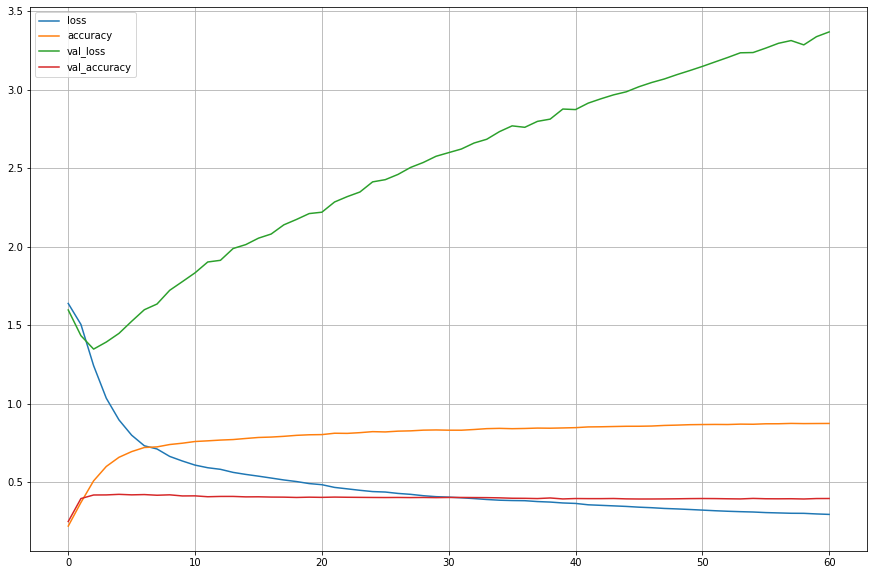

In [ ]:
# Graph plot of train process model
pd.DataFrame(model_learn.history).plot(figsize=(15, 10))
plt.grid(True)
plt.show()

In [ ]:
# predicting
y_pred = model.predict(X_train)
y_pred = np.argmax(y_pred,axis=1)

# Classification all models (base and improved)
print("Sequential base model evaluation: \n", classification_report(y_train, y_pred))

Sequential base model evaluation: 
               precision    recall  f1-score   support

           1       0.88      0.93      0.90      1543
           2       0.85      0.88      0.87      1593
           3       0.92      0.86      0.89      1581
           4       0.93      0.81      0.87      1575
           5       0.84      0.94      0.89      1530

    accuracy                           0.88      7822
   macro avg       0.89      0.88      0.88      7822
weighted avg       0.89      0.88      0.88      7822



In [ ]:
# Membuat Model
embedding_vector_features = 300 # setting untuk output dimension
model_imp = Sequential()
model_imp.add(Embedding(len(vocab)+1, embedding_vector_features, input_length = txt_length)) # len(vocab)+1 adalah input shape, vocab variabel di inisialisasi di tokenization section
model_imp.add(GRU(420))        # inisialisasi model lstm dengan output dimension 420
model_imp.add(Dropout(0.3))     # dropout layers
model_imp.add(BatchNormalization()) # Batch Normalization
model_imp.add(Dense(6, activation='softmax')) # output layer

model_imp.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics = 'accuracy')

In [ ]:
# ClearSession
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Define callbacks
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'accuracy',
                           mode = 'max',
                           patience = 3, 
                           restore_best_weights=True),
                           
            tf.keras.callbacks.ModelCheckpoint('model_imp', 
                            monitor='accuracy', 
                            save_best_only=True)
            ]

# Compiling model with Seq-API
model_imp_learn = model_imp.fit(training_batches, epochs = 100, validation_data = validation_batches,callbacks=callbacks)

Epoch 1/100
31/31 [==============================] - ETA: 0s - loss: 1.6565 - accuracy: 0.3306

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 11s 225ms/step - loss: 1.6565 - accuracy: 0.3306 - val_loss: 1.6728 - val_accuracy: 0.2942
Epoch 2/100
29/31 [===========================>..] - ETA: 0s - loss: 1.1322 - accuracy: 0.5609

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 7s 234ms/step - loss: 1.1280 - accuracy: 0.5611 - val_loss: 1.6143 - val_accuracy: 0.2320
Epoch 3/100
31/31 [==============================] - ETA: 0s - loss: 0.8574 - accuracy: 0.6662

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 6s 208ms/step - loss: 0.8574 - accuracy: 0.6662 - val_loss: 1.5971 - val_accuracy: 0.2495
Epoch 4/100
31/31 [==============================] - ETA: 0s - loss: 0.7150 - accuracy: 0.7116

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 6s 184ms/step - loss: 0.7150 - accuracy: 0.7116 - val_loss: 1.5785 - val_accuracy: 0.2482
Epoch 5/100
31/31 [==============================] - ETA: 0s - loss: 0.6321 - accuracy: 0.7434

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 9s 285ms/step - loss: 0.6321 - accuracy: 0.7434 - val_loss: 1.5726 - val_accuracy: 0.2560
Epoch 6/100
30/31 [============================>.] - ETA: 0s - loss: 0.5893 - accuracy: 0.7587

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 11s 361ms/step - loss: 0.5853 - accuracy: 0.7602 - val_loss: 1.5555 - val_accuracy: 0.2567
Epoch 7/100
30/31 [============================>.] - ETA: 0s - loss: 0.5555 - accuracy: 0.7745

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 6s 186ms/step - loss: 0.5516 - accuracy: 0.7759 - val_loss: 1.5437 - val_accuracy: 0.2808
Epoch 8/100
31/31 [==============================] - ETA: 0s - loss: 0.5224 - accuracy: 0.7822

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 7s 216ms/step - loss: 0.5224 - accuracy: 0.7822 - val_loss: 1.4897 - val_accuracy: 0.3557
Epoch 9/100
31/31 [==============================] - ETA: 0s - loss: 0.5019 - accuracy: 0.7889

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 6s 186ms/step - loss: 0.5019 - accuracy: 0.7889 - val_loss: 1.5153 - val_accuracy: 0.2989
Epoch 10/100
31/31 [==============================] - ETA: 0s - loss: 0.4874 - accuracy: 0.7989

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 6s 204ms/step - loss: 0.4874 - accuracy: 0.7989 - val_loss: 1.4705 - val_accuracy: 0.3631
Epoch 11/100
31/31 [==============================] - 1s 37ms/step - loss: 0.4879 - accuracy: 0.7948 - val_loss: 1.7145 - val_accuracy: 0.2957
Epoch 12/100
31/31 [==============================] - ETA: 0s - loss: 0.4555 - accuracy: 0.8099

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 5s 183ms/step - loss: 0.4555 - accuracy: 0.8099 - val_loss: 1.5824 - val_accuracy: 0.3328
Epoch 13/100
30/31 [============================>.] - ETA: 0s - loss: 0.4517 - accuracy: 0.8125

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 10s 330ms/step - loss: 0.4489 - accuracy: 0.8142 - val_loss: 1.8837 - val_accuracy: 0.2992
Epoch 14/100
31/31 [==============================] - ETA: 0s - loss: 0.4325 - accuracy: 0.8215

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 10s 322ms/step - loss: 0.4325 - accuracy: 0.8215 - val_loss: 1.8299 - val_accuracy: 0.3054
Epoch 15/100
30/31 [============================>.] - ETA: 0s - loss: 0.4274 - accuracy: 0.8233

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 8s 275ms/step - loss: 0.4243 - accuracy: 0.8247 - val_loss: 1.9495 - val_accuracy: 0.3463
Epoch 16/100
29/31 [===========================>..] - ETA: 0s - loss: 0.4148 - accuracy: 0.8262

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 8s 279ms/step - loss: 0.4144 - accuracy: 0.8277 - val_loss: 2.5258 - val_accuracy: 0.2956
Epoch 17/100
31/31 [==============================] - ETA: 0s - loss: 0.4084 - accuracy: 0.8325

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 9s 304ms/step - loss: 0.4084 - accuracy: 0.8325 - val_loss: 2.1908 - val_accuracy: 0.3576
Epoch 18/100
31/31 [==============================] - 1s 36ms/step - loss: 0.4015 - accuracy: 0.8319 - val_loss: 2.2593 - val_accuracy: 0.3893
Epoch 19/100
31/31 [==============================] - ETA: 0s - loss: 0.3942 - accuracy: 0.8335

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 6s 215ms/step - loss: 0.3942 - accuracy: 0.8335 - val_loss: 2.7106 - val_accuracy: 0.3626
Epoch 20/100
31/31 [==============================] - ETA: 0s - loss: 0.3905 - accuracy: 0.8374

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 7s 237ms/step - loss: 0.3905 - accuracy: 0.8374 - val_loss: 2.7829 - val_accuracy: 0.3749
Epoch 21/100
29/31 [===========================>..] - ETA: 0s - loss: 0.3933 - accuracy: 0.8382

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 9s 294ms/step - loss: 0.3877 - accuracy: 0.8397 - val_loss: 3.1871 - val_accuracy: 0.3569
Epoch 22/100
30/31 [============================>.] - ETA: 0s - loss: 0.3812 - accuracy: 0.8402

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 7s 247ms/step - loss: 0.3781 - accuracy: 0.8417 - val_loss: 3.0993 - val_accuracy: 0.3794
Epoch 23/100
29/31 [===========================>..] - ETA: 0s - loss: 0.3697 - accuracy: 0.8440

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 8s 277ms/step - loss: 0.3653 - accuracy: 0.8459 - val_loss: 3.2052 - val_accuracy: 0.3711
Epoch 24/100
30/31 [============================>.] - ETA: 0s - loss: 0.3638 - accuracy: 0.8500

INFO:tensorflow:Assets written to: model_imp/assets


INFO:tensorflow:Assets written to: model_imp/assets


31/31 [==============================] - 8s 255ms/step - loss: 0.3610 - accuracy: 0.8513 - val_loss: 3.7270 - val_accuracy: 0.3394
Epoch 25/100
31/31 [==============================] - 1s 42ms/step - loss: 0.3611 - accuracy: 0.8489 - val_loss: 3.6870 - val_accuracy: 0.3484
Epoch 26/100
31/31 [==============================] - 1s 38ms/step - loss: 0.3710 - accuracy: 0.8462 - val_loss: 3.7045 - val_accuracy: 0.3597
Epoch 27/100
31/31 [==============================] - 1s 36ms/step - loss: 0.3557 - accuracy: 0.8500 - val_loss: 3.7862 - val_accuracy: 0.3663


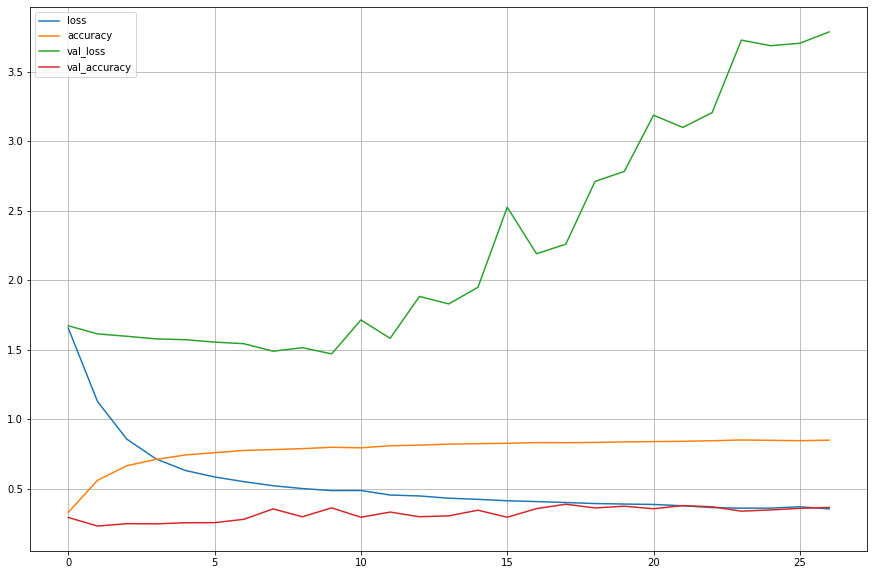

In [ ]:
# Graph plot of train process model
pd.DataFrame(model_imp_learn.history).plot(figsize=(15, 10))
plt.grid(True)
plt.show()

In [ ]:
# predicting
y_pred_imp = model_imp.predict(X_train)
y_pred_imp = np.argmax(y_pred_imp,axis=1)

# Classification all models (base and improved)
print("Sequential base model evaluation: \n", classification_report(y_train, y_pred_imp))

Sequential base model evaluation: 
               precision    recall  f1-score   support

           1       0.99      0.72      0.83      1543
           2       0.84      0.77      0.80      1593
           3       0.87      0.78      0.82      1581
           4       0.54      1.00      0.70      1575
           5       0.98      0.59      0.74      1530

    accuracy                           0.77      7822
   macro avg       0.84      0.77      0.78      7822
weighted avg       0.84      0.77      0.78      7822



# 20. Model Inference

In [ ]:
data_inf

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,0,0,3,"Strong but flat, lacking definition","These k-cups are certainly bold and strong, bu..."
1,1,2,4,"""I never saw a purple cow...""","A friend gave me a bar of this <a href=""http:/..."
2,1,1,5,Awesome treats,My dog LOVES these. I should have gotten the b...
3,0,0,5,Will buy again,I put this coconut oil on a subscription from ...
4,0,0,5,Best pickles ever!,"At a recent dinner party, someone opened a jar..."
5,0,1,5,Thanks,First time trying product. Not sure how the re...
6,0,1,5,"Nearly all the ""superfoods"" packed into one ba...","This bar boasts cranberries, blueberries, pome..."
7,0,31,2,FALSE ADVERTISING,"OH YES, this is puffed rice all right. BUT ITS..."
8,0,0,5,Enjoy your WASA crisp bread,I am hooked on WASA Hearty Rye Crisp bread bec...
9,0,0,5,GREAT DRESSING!,I tried the ginger carrot dressing while I was...


In [ ]:
# cleaning data
infdat = data_inf.drop('Score', axis = 1)
infdat['Text'] = infdat['Text'].apply(lambda x:clean_text(x))

corpusinf = []
for i in range(0, len(infdat)):
  txt = infdat['Text'][i]
  txt = txt.split()  # splitting data
  txt = [ss.stem(word) for word in txt if not word in stopwords.words('english')] # steeming setiap huruf dengan pengecualian kata yang ada dalam stopwords
  txt = ' '.join(txt)
  corpusinf.append(txt)

infdat['corpusinf'] = corpusinf
infdat.reset_index(inplace = True)

# encoding
inf_enc_corps = [one_hot(words, voc_size) for words in corpusinf]

# Tokenization
inf_word_idx = tokenizer.texts_to_sequences(infdat['corpusinf'])
inf_padded_seqs = pad_sequences(inf_word_idx, maxlen = txt_length)

# Predicting
y_pred_inf = model.predict(inf_padded_seqs)
y_pred_inf_1 = model_imp.predict(inf_padded_seqs)
y_pred_inf = np.argmax(y_pred_inf,axis=1)
y_pred_inf_1= np.argmax(y_pred_inf_1,axis=1)

# Concate between Inference-Set and Prediction
pd.concat([data_inf, pd.DataFrame({'Prediction':y_pred_inf, 'Prediction_Imp':y_pred_inf_1})], axis=1)


,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Prediction,Prediction_Imp
0,0,0,3,"Strong but flat, lacking definition","These k-cups are certainly bold and strong, bu...",3,5
1,1,2,4,"""I never saw a purple cow...""","A friend gave me a bar of this <a href=""http:/...",1,5
2,1,1,5,Awesome treats,My dog LOVES these. I should have gotten the b...,3,5
3,0,0,5,Will buy again,I put this coconut oil on a subscription from ...,2,2
4,0,0,5,Best pickles ever!,"At a recent dinner party, someone opened a jar...",1,1
5,0,1,5,Thanks,First time trying product. Not sure how the re...,5,5
6,0,1,5,"Nearly all the ""superfoods"" packed into one ba...","This bar boasts cranberries, blueberries, pome...",5,4
7,0,31,2,FALSE ADVERTISING,"OH YES, this is puffed rice all right. BUT ITS...",0,5
8,0,0,5,Enjoy your WASA crisp bread,I am hooked on WASA Hearty Rye Crisp bread bec...,2,4
9,0,0,5,GREAT DRESSING!,I tried the ginger carrot dressing while I was...,4,5


# 21. Future Improvement

Secara umum, model yang dibuat telah berhasil membedakan tone komentar positif dan komentar negatif. Prediksi yang dihasilkan pun sudah cukup memuaskan. Namun, karena model ini masih merupakan sebuah prototype tentunya masih harus terus dilakukan perbaikan untuk mendapatkan model dengan performa yang lebih baik.

Salah satu cara yang dapat dilakukan untuk meningkatkan performa model adalah dengan menggunakan data yang lebih banyak lagi, sehingga model memiliki cukup data untuk berlatih. Saat ini, karena keterbatasan waktu, model dibuat dengan data yang sudah dimodifikasi sesuai dengan kebutuhan. Untuk kedepannya model dapat dilatih dengan data yang jumlahnya lebih banyak tanpa terlalu banyak modifikasi, namun tentunya running timenya akan jauh lebih lama. 

Selain itu model juga dapat dikembangkan untuk menyesuaikan dengan konteks marketplace di Indonesia. Saat ini model memang dapat memproses komentar dalam Bahasa Indonesia, namun hal ini masih dilakukan dengan bantuan translator. Kedepannya jika model ini dibuat khusus untuk konteks Indonesia, maka pengerjaan dapat dilakukan dengan sedikit berbeda, misalnya dengan menggunakan stop words remover Sastrawi.